# Imports

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load dataset

In [3]:
def loadCIFARdataset():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    width, height = (x_train.shape[1], x_train.shape[2])

    # Reshape dataset to have a single channel, 
    # converting from integers to floats, and  
    # normalizing they range to [0-1]
    x_train = x_train.reshape(x_train.shape[0], 3*width*height).astype('float32') / 255
    x_test = x_test.reshape(x_test.shape[0], 3*width*height).astype('float32') / 255

    # Converting to one-hot encode for the target values
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train, x_test, y_test, width, height)

label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [13]:
x_train, y_train, x_test, y_test, width, height = loadCIFARdataset()

Text(0.5, 1.0, 'truck')

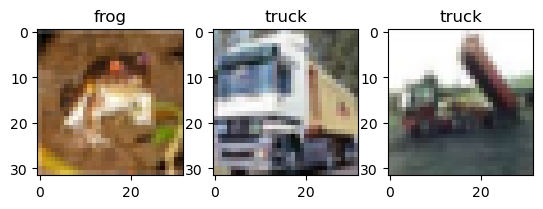

In [14]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(x_train[0, :3*width*height].reshape(width, height, 3))
ax[0].set_title(label_dict[np.argmax(y_train[0, :])])
ax[1].imshow(x_train[1, :3*width*height].reshape(width, height, 3))
ax[1].set_title(label_dict[np.argmax(y_train[1, :])])
ax[2].imshow(x_train[2, :3*width*height].reshape(width, height, 3))
ax[2].set_title(label_dict[np.argmax(y_train[2, :])])

# Define model

## Wide & Deep

Add input connection directly to output



In [29]:
input_ = keras.layers.Input(shape=3*width*height)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [30]:
model.layers

In [31]:
SGD = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=SGD, loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
NEpochs = 40 # Number of parsers through all data
minibatchSize = 32 # Size of each mini-batch backpropagation is performed on

NValid = int(0.1*x_train.shape[0]) # 10% data used for validation
x_valid, y_valid = x_train[:NValid, :], y_train[:NValid, :]
x_train, y_train = x_train[NValid:, :], y_train[NValid:, :]

In [21]:
history = model.fit(x_train, y_train, epochs=NEpochs, batch_size=minibatchSize,
                    validation_data=[x_valid, y_valid])

Epoch 1/40
1407/1407 [==============================] - 40s 27ms/step - loss: 2.1060 - accuracy: 0.2354 - val_loss: 1.9838 - val_accuracy: 0.2978
Epoch 2/40
1407/1407 [==============================] - 33s 24ms/step - loss: 1.9545 - accuracy: 0.3126 - val_loss: 1.9104 - val_accuracy: 0.3272
Epoch 3/40
1407/1407 [==============================] - 37s 27ms/step - loss: 1.9027 - accuracy: 0.3384 - val_loss: 1.8906 - val_accuracy: 0.3282
Epoch 4/40
1407/1407 [==============================] - 35s 25ms/step - loss: 1.8737 - accuracy: 0.3500 - val_loss: 1.8476 - val_accuracy: 0.3592
Epoch 5/40
1407/1407 [==============================] - 39s 28ms/step - loss: 1.8526 - accuracy: 0.3583 - val_loss: 1.8357 - val_accuracy: 0.3556
Epoch 6/40
1407/1407 [==============================] - 40s 29ms/step - loss: 1.8384 - accuracy: 0.3654 - val_loss: 1.8206 - val_accuracy: 0.3660
Epoch 7/40
1407/1407 [==============================] - 34s 24ms/step - loss: 1.8263 - accuracy: 0.3691 - val_loss: 1.8092 -

In [22]:
model.save("wide_and_deep_cifar10.h5")

In [23]:
def plotTrainingHistory(history):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='gray', label='test')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='orange', label='train')
    plt.plot(history.history['val_accuracy'], color='gray', label='test')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

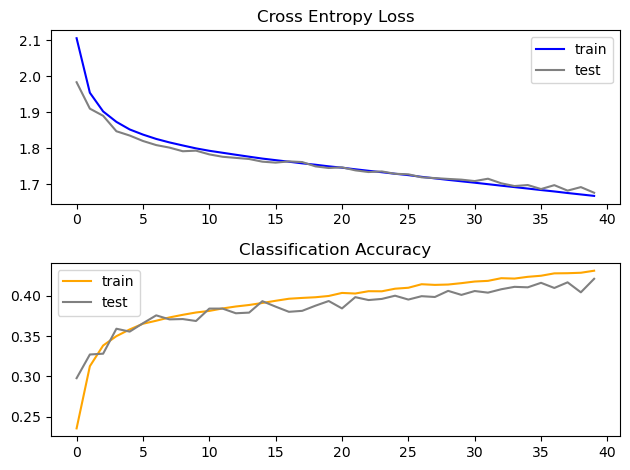

In [24]:
plotTrainingHistory(history=history)

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 3072)]       0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           92190       ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3102)         0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

How do we understand analitcally how many parameters we have?

Hidden1: $3072 \times 30 + 30 = 92190$

Hidden2: $30 \times 30 + 30 = 930$

Output: $(30 + 3072) \times 10 + 10 = 31030 $


Try to use callbacks, such as checkpoints and early stopping

In [ ]:
model.compile(optimizer=SGD, loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("checkpoint_wide_and_deep_cifar10.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

print_val_train_ratio = PrintValTrainRatioCallback()

In [34]:
history = model.fit(x_train, y_train, epochs=NEpochs, batch_size=minibatchSize,
                    validation_data=[x_valid, y_valid],
                    callbacks=[checkpoint_cb, early_stopping_cb, print_val_train_ratio])

Epoch 1/40
1266/1266 [==============================] - ETA: 0s - loss: 2.1171 - accuracy: 0.2331
val/train: 0.95
1266/1266 [==============================] - 27s 21ms/step - loss: 2.1171 - accuracy: 0.2331 - val_loss: 2.0068 - val_accuracy: 0.2884
Epoch 2/40
1263/1266 [============================>.] - ETA: 0s - loss: 1.9637 - accuracy: 0.3135
val/train: 0.98
1266/1266 [==============================] - 29s 23ms/step - loss: 1.9638 - accuracy: 0.3136 - val_loss: 1.9293 - val_accuracy: 0.3331
Epoch 3/40
1266/1266 [==============================] - ETA: 0s - loss: 1.9103 - accuracy: 0.3341
val/train: 0.99
1266/1266 [==============================] - 30s 24ms/step - loss: 1.9103 - accuracy: 0.3341 - val_loss: 1.8936 - val_accuracy: 0.3451
Epoch 4/40
1263/1266 [============================>.] - ETA: 0s - loss: 1.8795 - accuracy: 0.3486
val/train: 1.00
1266/1266 [==============================] - 27s 21ms/step - loss: 1.8794 - accuracy: 0.3486 - val_loss: 1.8776 - val_accuracy: 0.3509
Epoc

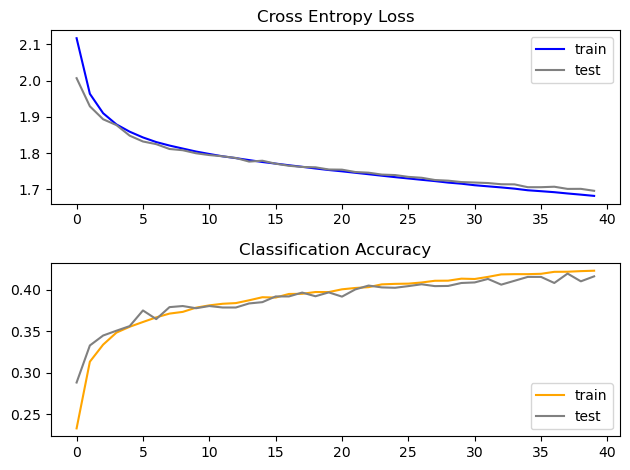

In [35]:
plotTrainingHistory(history=history)